In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('Medicalpremium.csv')

In [2]:
#Preprocessing. This is a clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [3]:
df.describe()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


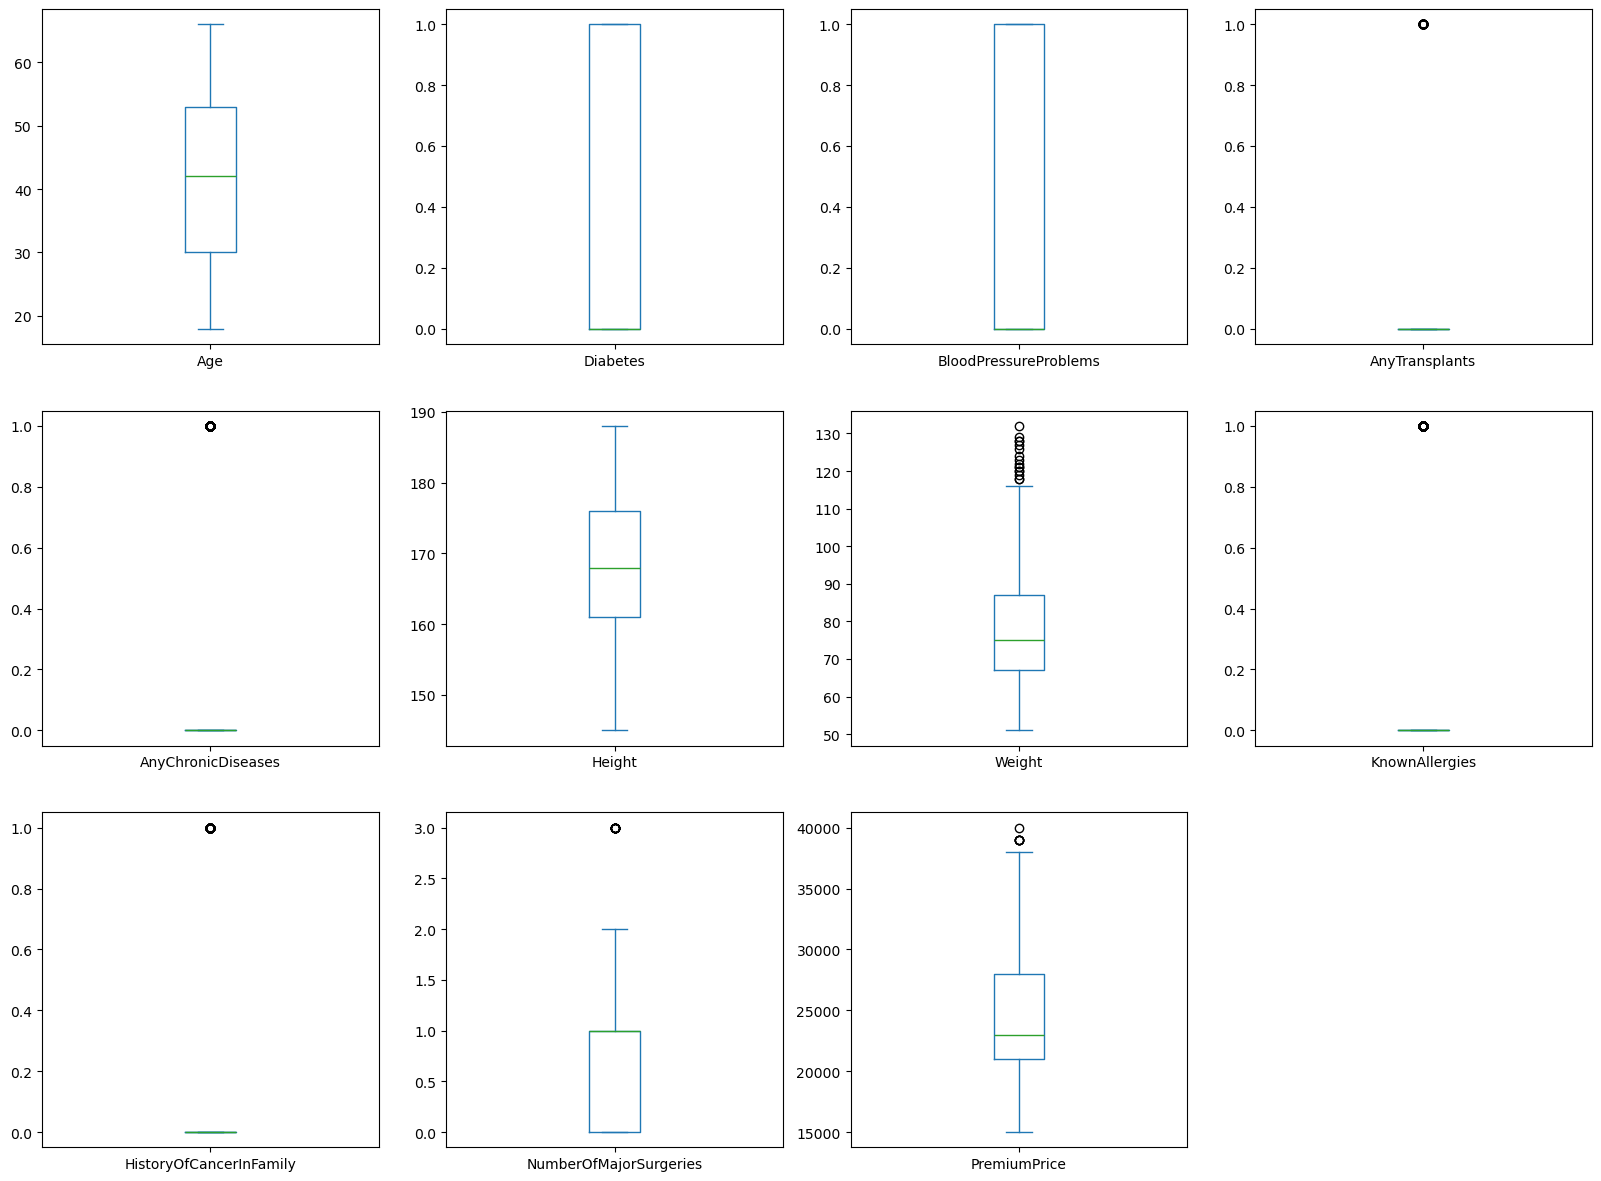

In [4]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

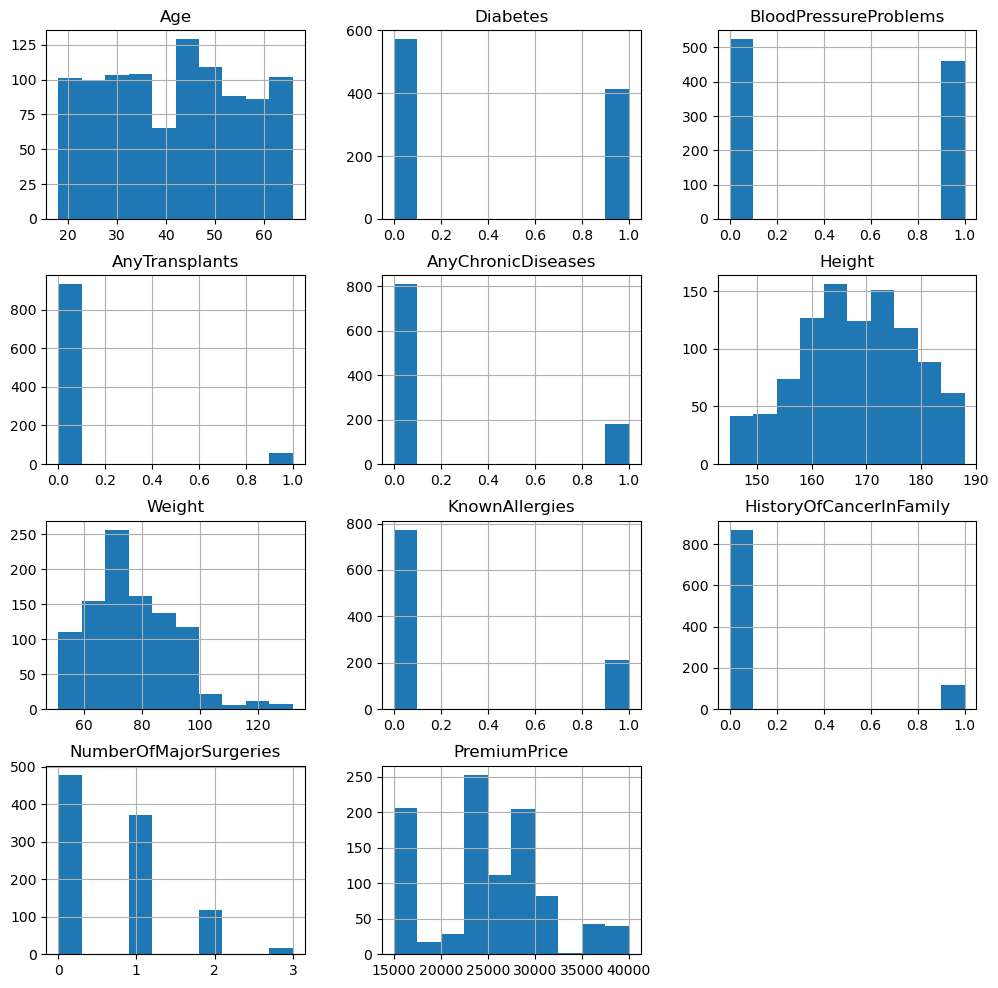

In [5]:
df.hist(figsize=(12,12))
plt.show()

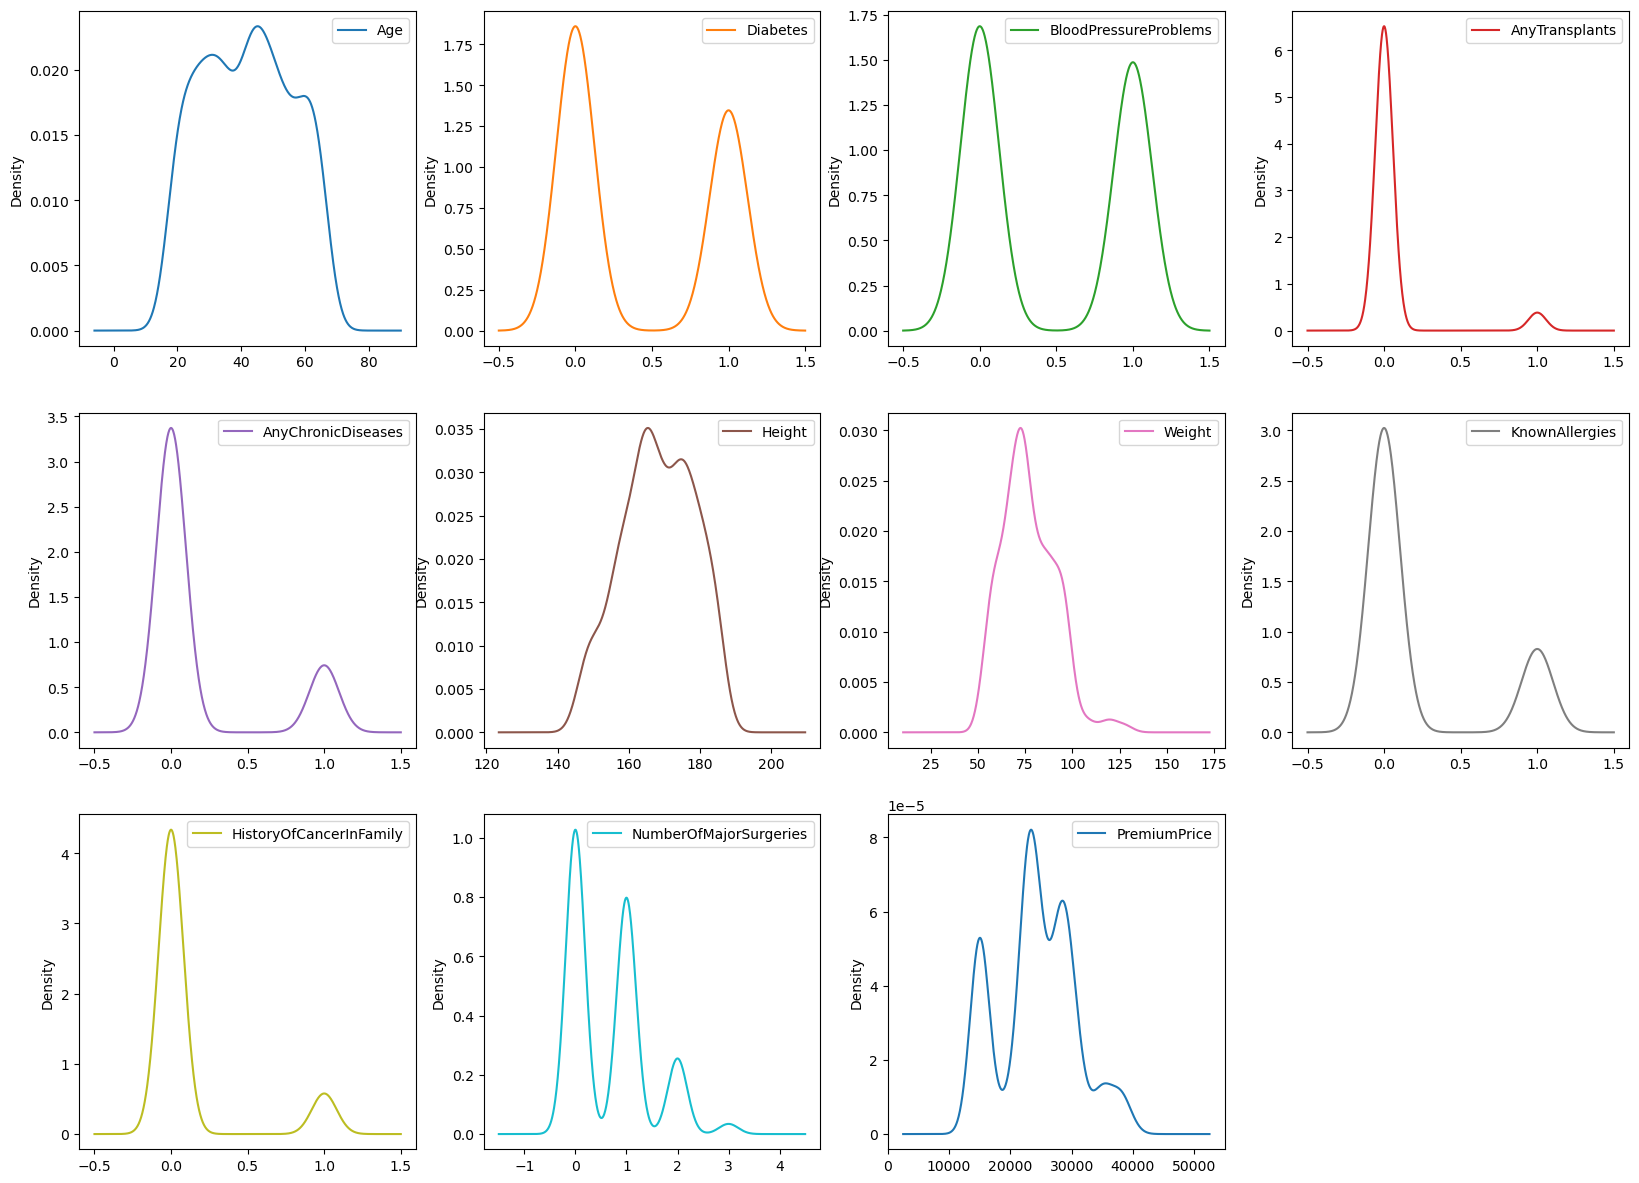

In [6]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False,legend=True, fontsize=10, 
        figsize=(20,20)) 
plt.show()

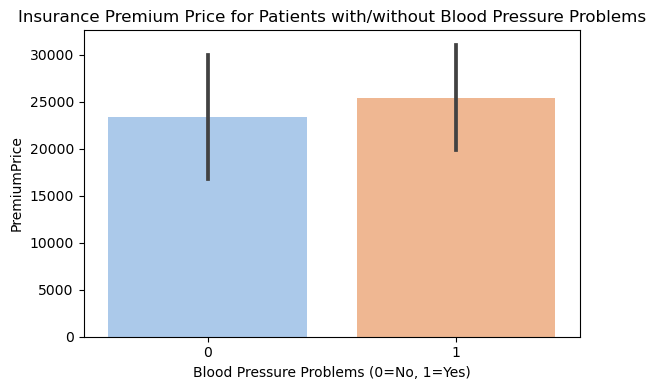

In [7]:
#Insurance Premium Price for patients with/without blood pressure problems
plt.figure(figsize=(6,4))
sns.barplot(data=df, x= 'BloodPressureProblems', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without Blood Pressure Problems')
plt.xlabel('Blood Pressure Problems (0=No, 1=Yes)')
plt.ylabel('PremiumPrice')
plt.tight_layout()

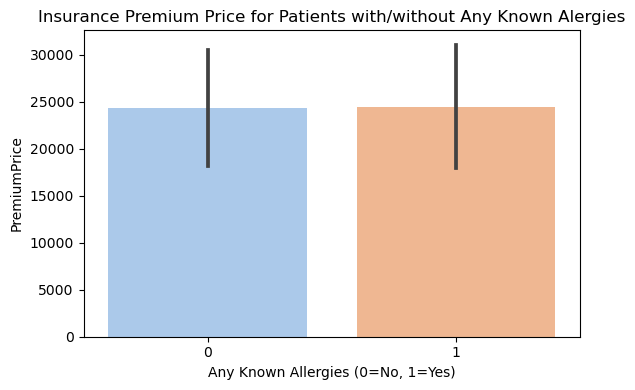

In [8]:
#Insurance Premium Price for patients with/without Any Known Allergies
plt.figure(figsize=(6,4))
sns.barplot(data=df, x= 'KnownAllergies', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without Any Known Alergies')
plt.xlabel('Any Known Allergies (0=No, 1=Yes)')
plt.ylabel('PremiumPrice')
plt.tight_layout()
plt.show()

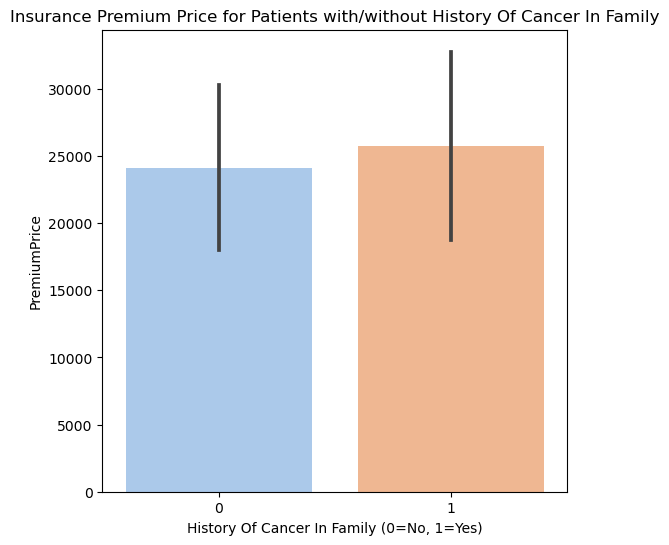

In [9]:
#Insurance Premium Price for patients with/without Any History of Cancer in family
plt.figure(figsize=(6,6))
sns.barplot(data=df, x= 'HistoryOfCancerInFamily', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without History Of Cancer In Family')
plt.xlabel('History Of Cancer In Family (0=No, 1=Yes)')
plt.ylabel('PremiumPrice')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


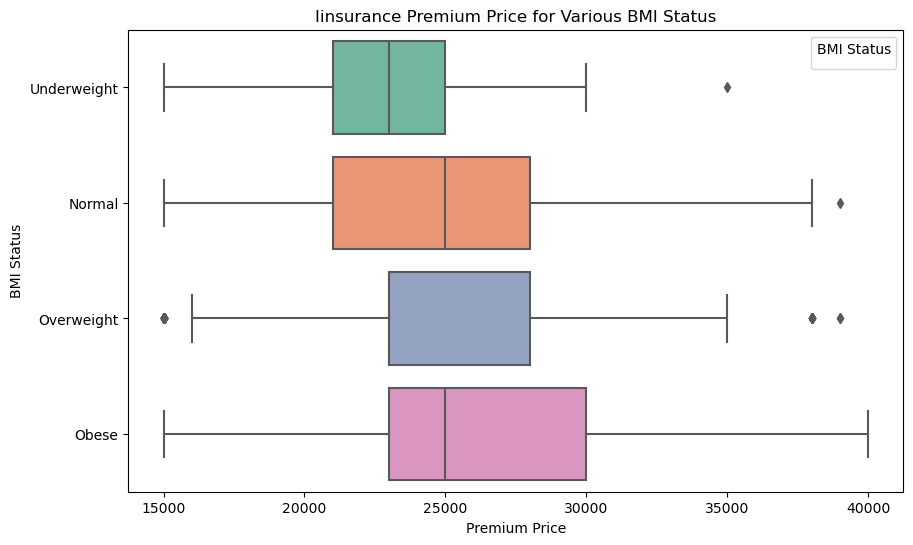

In [10]:
#Insurance Premium Price for Various BMI Status
#BMI calculation needed
#Bins needed for normal, overweight, obese, and underweight.

# Step 1: Calculate bmi from weight / (height/100)*2
df['BMI'] = df['Weight'] / (df['Height']/100)**2

# Step 2: Create BMI_Status bins
bins = [0,18.5,24.9,29.9, float('inf')]
labels = ['Underweight','Normal','Overweight','Obese']
df['BMI_Status']= pd.cut(df['BMI'], bins=bins, labels=labels)



#Step 3: Plot horizontal boxplot using seaborn
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x= 'PremiumPrice', y= 'BMI_Status', palette='Set2')
plt.title('Iinsurance Premium Price for Various BMI Status')
plt.xlabel('Premium Price')
plt.ylabel('BMI Status')
plt.legend(title='BMI Status', loc='upper right')
plt.tight_layout
plt.show()

In [11]:
BMI_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese':4}
df['BMI_Status'] = df['BMI_Status'].replace(BMI_mapping)
print(df)


     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

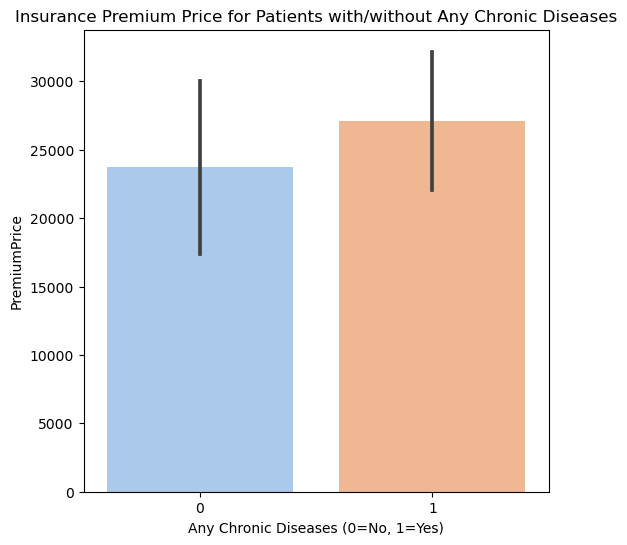

In [12]:
#Insurance Premium Price for patients with/without any chronic Diseases
plt.figure(figsize=(6,6))
sns.barplot(data=df, x= 'AnyChronicDiseases', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without Any Chronic Diseases')
plt.xlabel('Any Chronic Diseases (0=No, 1=Yes)')
plt.ylabel('PremiumPrice')
plt.show()

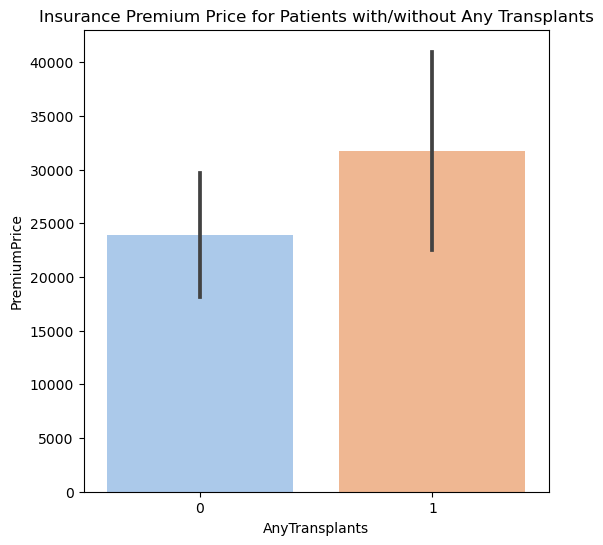

In [13]:
#Insurance Premium Price for patients with/without any Transplants
plt.figure(figsize=(6,6))
sns.barplot(data=df, x= 'AnyTransplants', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without Any Transplants')
plt.xlabel('AnyTransplants')
plt.ylabel('PremiumPrice')
plt.show()

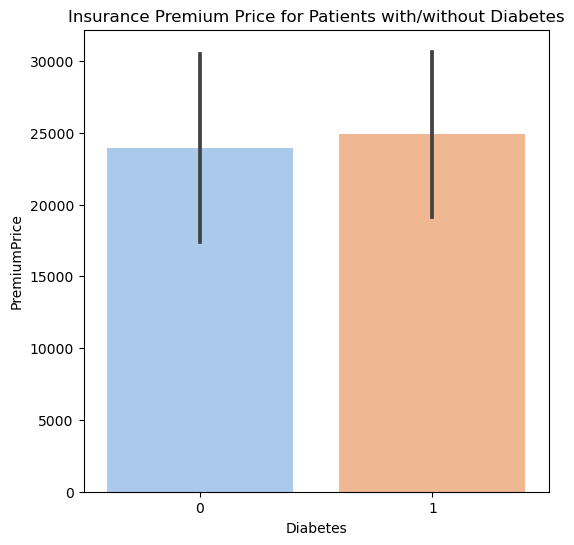

In [14]:
#Insurance Premium Price for diabetic vs non-diabetic patients
plt.figure(figsize=(6,6))
sns.barplot(data=df, x= 'Diabetes', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients with/without Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('PremiumPrice')
plt.show()

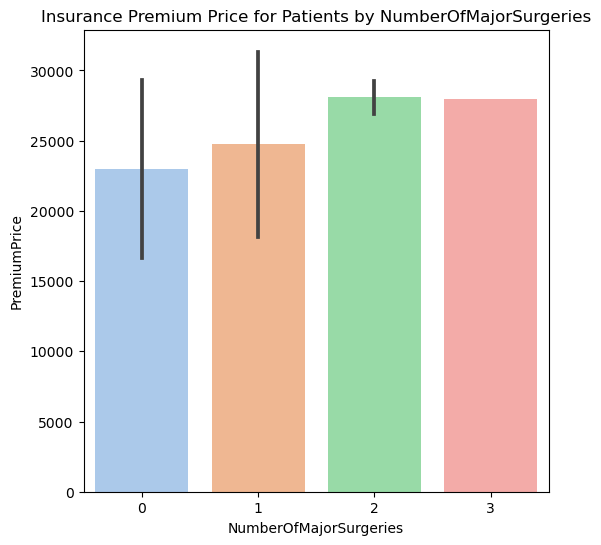

In [15]:
#Insurance Premium Price for number of major surgeries by patients
plt.figure(figsize=(6,6))
sns.barplot(data=df, x= 'NumberOfMajorSurgeries', y= 'PremiumPrice', errorbar= 'sd', palette= 'pastel')
plt.title('Insurance Premium Price for Patients by NumberOfMajorSurgeries')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('PremiumPrice')
plt.show()

In [16]:
# Models
# After preprocessing, all features were selected for experiement
# 70/30 Train/Test split. 
# As result of training dataset, models were created to predict premiums
# Testing dataset used to evaluate regression models
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  BMI                      986 non-null    float64 
 12  BMI_Status               986 non-null    category
dtypes: category(1), float64(1), int64(11)
memory usage: 93.7 KB


In [18]:
# XGBoostRegressor
#Split into x and y
X = df.drop('BMI_Status', axis=1)
y = df['BMI_Status']

#Split x and y into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


#fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [19]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [20]:
# Evaluate predicions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.64%
